In [1]:
import pandas as pd
import matplotlib.pyplot as plt


path = 'wholesale-trade-survey-september-2022-quarter-csv.csv'
dataframe = pd.read_csv(path)
dataframe

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,WTSQ.SFA1CA,1995.03,2368.69,NaN,F,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Basic material wholesaling,Sales (operating income),Current prices,Unadjusted,NaN
1,WTSQ.SFA1CA,1995.06,2100.44,NaN,F,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Basic material wholesaling,Sales (operating income),Current prices,Unadjusted,NaN
2,WTSQ.SFA1CA,1995.09,2070.21,NaN,F,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Basic material wholesaling,Sales (operating income),Current prices,Unadjusted,NaN
3,WTSQ.SFA1CA,1995.12,2284.77,NaN,F,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Basic material wholesaling,Sales (operating income),Current prices,Unadjusted,NaN
4,WTSQ.SFA1CA,1996.03,2134.76,NaN,F,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Basic material wholesaling,Sales (operating income),Current prices,Unadjusted,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,WTSQ.SFZ9CT,2021.09,NaN,NaN,C,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Total wholesaling,Total stocks,Current prices,Trend,NaN
5092,WTSQ.SFZ9CT,2021.12,NaN,NaN,C,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Total wholesaling,Total stocks,Current prices,Trend,NaN
5093,WTSQ.SFZ9CT,2022.03,NaN,NaN,C,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Total wholesaling,Total stocks,Current prices,Trend,NaN
5094,WTSQ.SFZ9CT,2022.06,NaN,NaN,C,Dollars,6,Wholesale Trade Survey - WTS,Industry by variable - (ANZSIC06) - Subannual ...,Total wholesaling,Total stocks,Current prices,Trend,NaN


# Câu 1: Hiện trạng của các cuộc giao dịch?

STATUS
C     154
F    1781
R    3161
Name: STATUS, dtype: int64


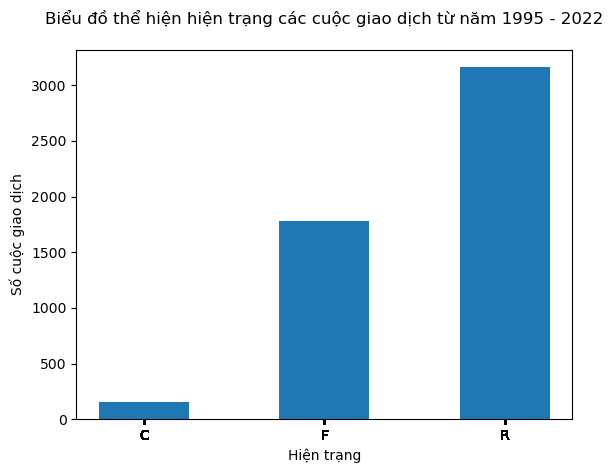

In [3]:
#Lấy ra giá trị của status
status_value = dataframe.groupby(['STATUS'])['STATUS'].count()
print(status_value)
status = ['C', 'F', 'R']
x = status
y = status_value

#Tạo biểu đồ bằng matplot (dạng cột)
plt.bar(x = status, height = status_value, width = 0.5)
plt.title('Biểu đồ thể hiện hiện trạng các cuộc giao dịch từ năm 1995 - 2022\n')
plt.xticks(dataframe.STATUS)
plt.xlabel('Hiện trạng')
plt.ylabel('Số cuộc giao dịch')
plt.show()

# Câu 2: Series có giá trị thương mại cao nhất?

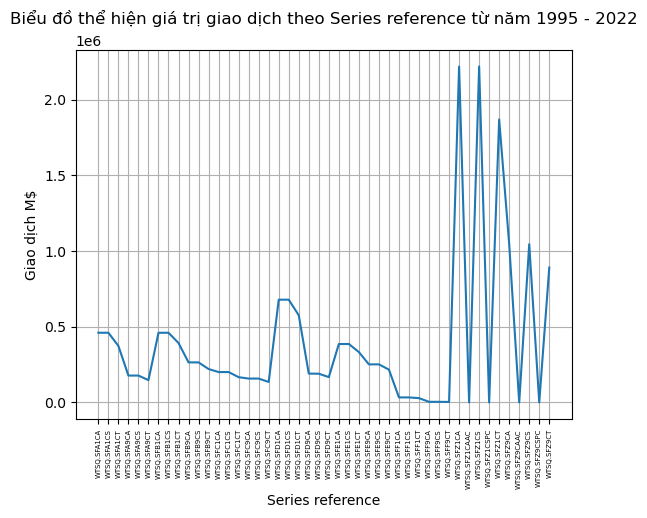

In [5]:
#Lấy ra giá trị của Data_value theo Series_reference
value_series = dataframe.groupby('Series_reference')['Data_value'].sum()
series_reference= dataframe['Series_reference'].unique()
x = series_reference
y = value_series

#Tạo biểu đồ bằng matplot (dạng đường)
plt.plot(series_reference, value_series)
#Tạo khung lưới cho biểu đồ bằng matplot
plt.grid()
plt.xticks(series_reference, size=5, rotation=90)
plt.title('Biểu đồ thể hiện giá trị giao dịch theo Series reference từ năm 1995 - 2022\n')
plt.xlabel('Series reference')
plt.ylabel('Giao dịch M$')

plt.show()

# Câu 3: Series có giá trị giao dịch cao nhất trong Series 1?

Series_title_1
Basic material wholesaling                           1795790.108
Commission-based wholesaling                          106167.444
Grocery, liquor and tobacco product wholesaling      2480049.867
Machinery and equipment wholesaling                  2062011.252
Motor vehicle and motor vehicle parts wholesaling    1018571.430
Others goods wholesaling                             1823843.610
Total wholesaling                                    9287994.255
Name: Data_value, dtype: float64


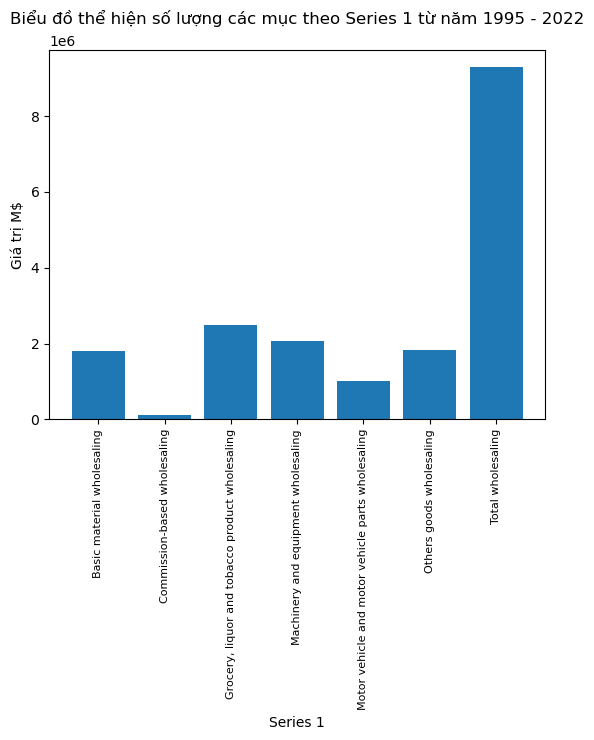

In [7]:
#Lấy ra giá trị của Data_value theo series_title_1
til1_val = dataframe.groupby('Series_title_1').sum()['Data_value']
print(til1_val)
til1 = []
for title, value in til1_val.items():
    til1.append(title)
#Tạo biểu đồ bằng matplot (dạng cột)
plt.bar(x=til1, height=til1_val)
plt.xticks(til1, size=8, rotation=90)

plt.title('Biểu đồ thể hiện số lượng các mục theo Series 1 từ năm 1995 - 2022\n')
plt.xlabel('Series 1')
plt.ylabel('Giá trị M$')
plt.show()

# Câu 4: Năm có giá trị giao dịch cao nhất?

In [ ]:
#Lấy ra giá trị của Data_value theo Period trừ các đơn vị tính PERCENT
dataframe['Period'] = pd.to_datetime(dataframe['Period'], format='%Y')
dataframe = dataframe[dataframe['UNITS'] != 'PERCENT']
value = dataframe.groupby('Period').sum()['Data_value']
years= dataframe['Period'].unique()

#Tạo biểu đồ bằng matplot (dạng đường)
plt.plot(years, value)
plt.xticks(years, size=5, rotation=90)

#Tạo khung lưới cho biểu đồ bằng matplot
plt.grid()
plt.title('Biểu đồ thể hiện giá trị giao dịch theo năm từ 1995 đến 2022\n')
plt.xlabel('Năm')
plt.ylabel('Giao dịch M$')
plt.show()

# Câu 5: Tỉ lệ sử dụng các mục của Series Title 4

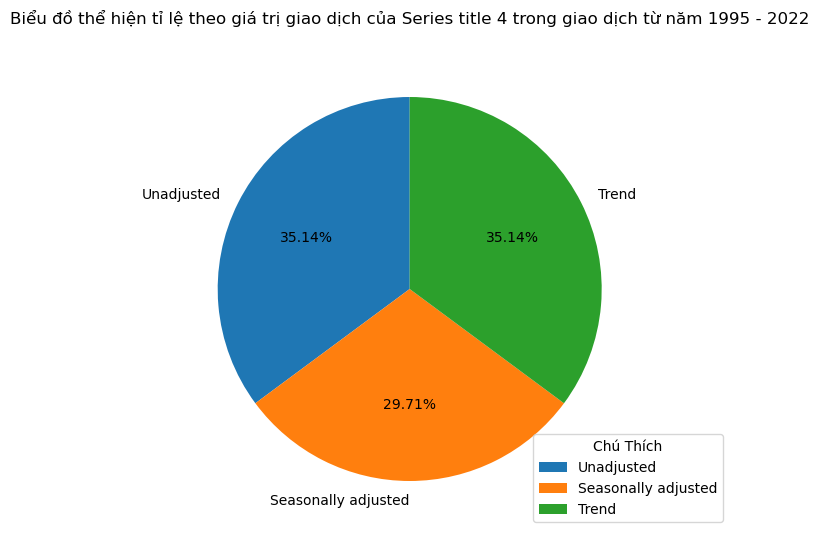

In [12]:
Series_title_4_value = dataframe.groupby(['Series_title_4'])['Data_value'].sum()
Series_title_4 = dataframe['Series_title_4'].unique()
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.axis('equal')
ax.pie(Series_title_4_value, labels = Series_title_4,autopct='%1.2f%%',startangle=90)
plt.title('Biểu đồ thể hiện tỉ lệ theo giá trị giao dịch của Series title 4 trong giao dịch từ năm 1995 - 2022\n')
plt.legend(title = 'Chú Thích',loc = 'lower right')
plt.show()